<a href="https://colab.research.google.com/github/Zabihuddin/data_analysis/blob/main/leakage_data_prevention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
# Connect to Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Available columns: Index(['Timestamp', 'User_ID', 'IP_Address', 'File_Accessed', 'Data_Size_MB',
       'Action_Type', 'Anomaly_Score', 'Label'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Timestamp      1000 non-null   object 
 1   User_ID        1000 non-null   object 
 2   IP_Address     1000 non-null   object 
 3   File_Accessed  815 non-null    object 
 4   Data_Size_MB   1000 non-null   float64
 5   Action_Type    1000 non-null   object 
 6   Anomaly_Score  1000 non-null   float64
 7   Label          1000 non-null   object 
dtypes: float64(2), object(6)
memory usage: 62.6+ KB
       Data_Size_MB  Anomaly_Score
count   1000.000000    1000.000000
mean      98.998500       0.526749
std      166.399165       0.297387
min        0.000000       0.000808
25%        5.200000       0.259338
50%       25.600000     

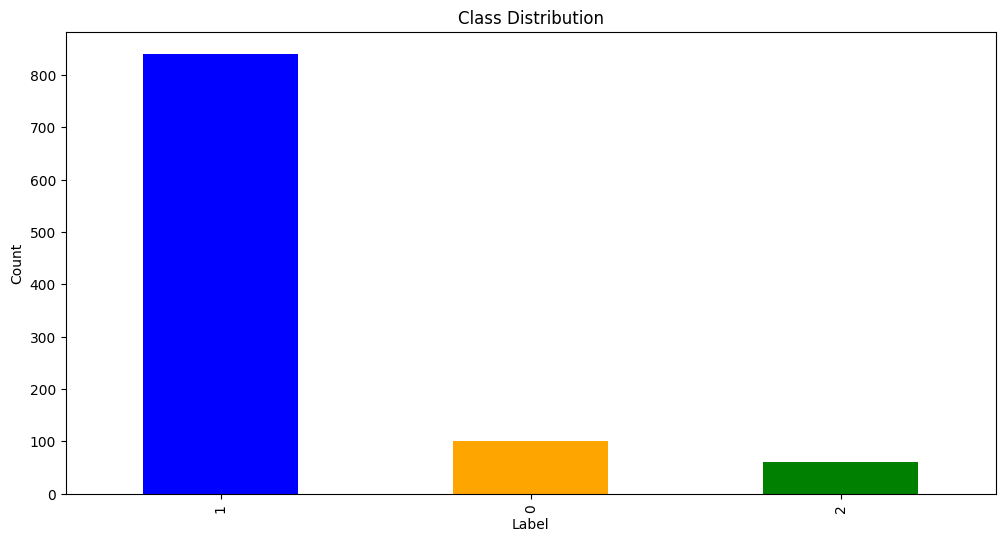

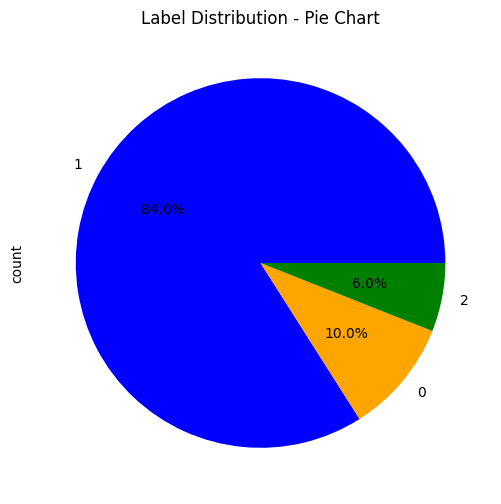

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve

# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cloud_security_large_dataset.csv')
df.head(5)

# Display dataset columns for debugging
print("Available columns:", df.columns)
df.info()

# Remove any leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# Convert timestamp column to datetime if exists and drop them before modeling
date_cols = [col for col in df.columns if 'date' in col.lower() or 'time' in col.lower()]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Drop datetime columns before processing
df = df.drop(columns=date_cols, errors='ignore')

# Display basic statistical info
print(df.describe())

# Check if categorical columns exist before encoding
expected_categorical_cols = ['User_ID', 'IP_Address', 'File_Accessed', 'Action_Type', 'Label']
categorical_cols = [col for col in expected_categorical_cols if col in df.columns]

# Encoding categorical columns
label_encoders = {}
for col in categorical_cols:
    print(f"Encoding column: {col}")
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string before encoding
    label_encoders[col] = le

# Data Visualizations
plt.figure(figsize=(12,6))
df['Label'].value_counts().plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title("Class Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6,6))
df['Label'].value_counts().plot.pie(autopct='%1.1f%%', colors=['blue', 'orange', 'green'])
plt.title("Label Distribution - Pie Chart")
plt.show()



# Splitting Data
if 'Label' in df.columns:
    X = df.drop(columns=['Label'])  # Features
    y = df['Label']  # Target
else:
    raise KeyError("Label column is missing from the dataset")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)





Available columns: Index(['Timestamp', 'User_ID', 'IP_Address', 'File_Accessed', 'Data_Size_MB',
       'Action_Type', 'Anomaly_Score', 'Label'],
      dtype='object')
       Data_Size_MB  Anomaly_Score
count   1000.000000    1000.000000
mean      98.998500       0.526515
std      166.399165       0.297479
min        0.000000       0.000808
25%        5.200000       0.259338
50%       25.600000       0.545248
75%      100.000000       0.791155
max      500.000000       0.999830
Encoding column: User_ID
Encoding column: IP_Address
Encoding column: File_Accessed
Encoding column: Action_Type
Encoding column: Label


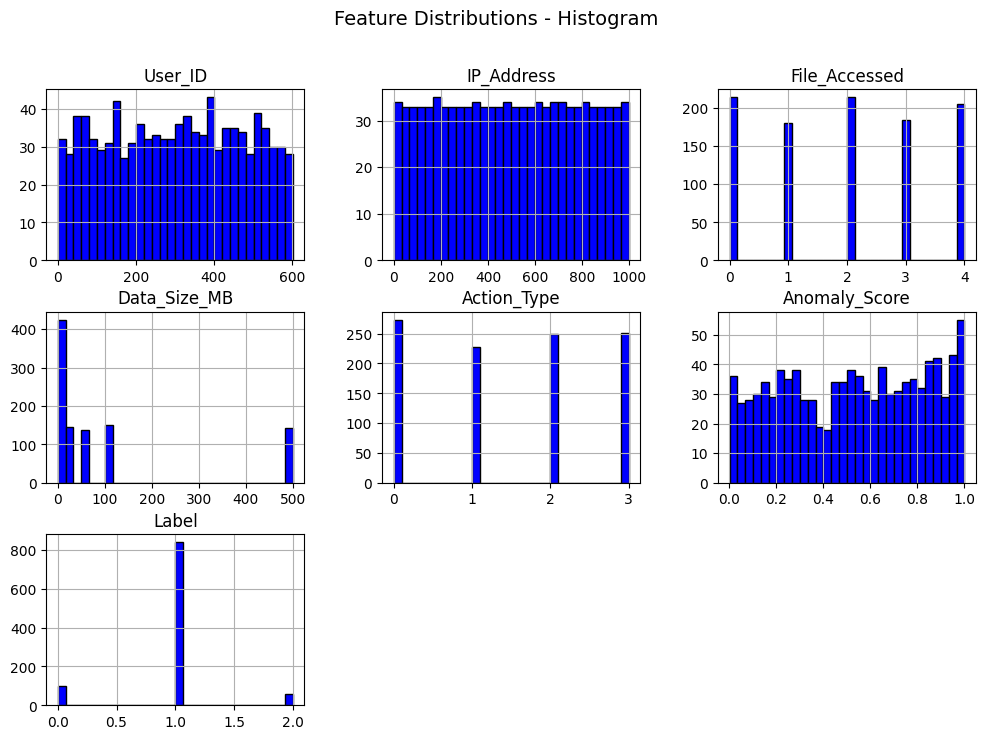

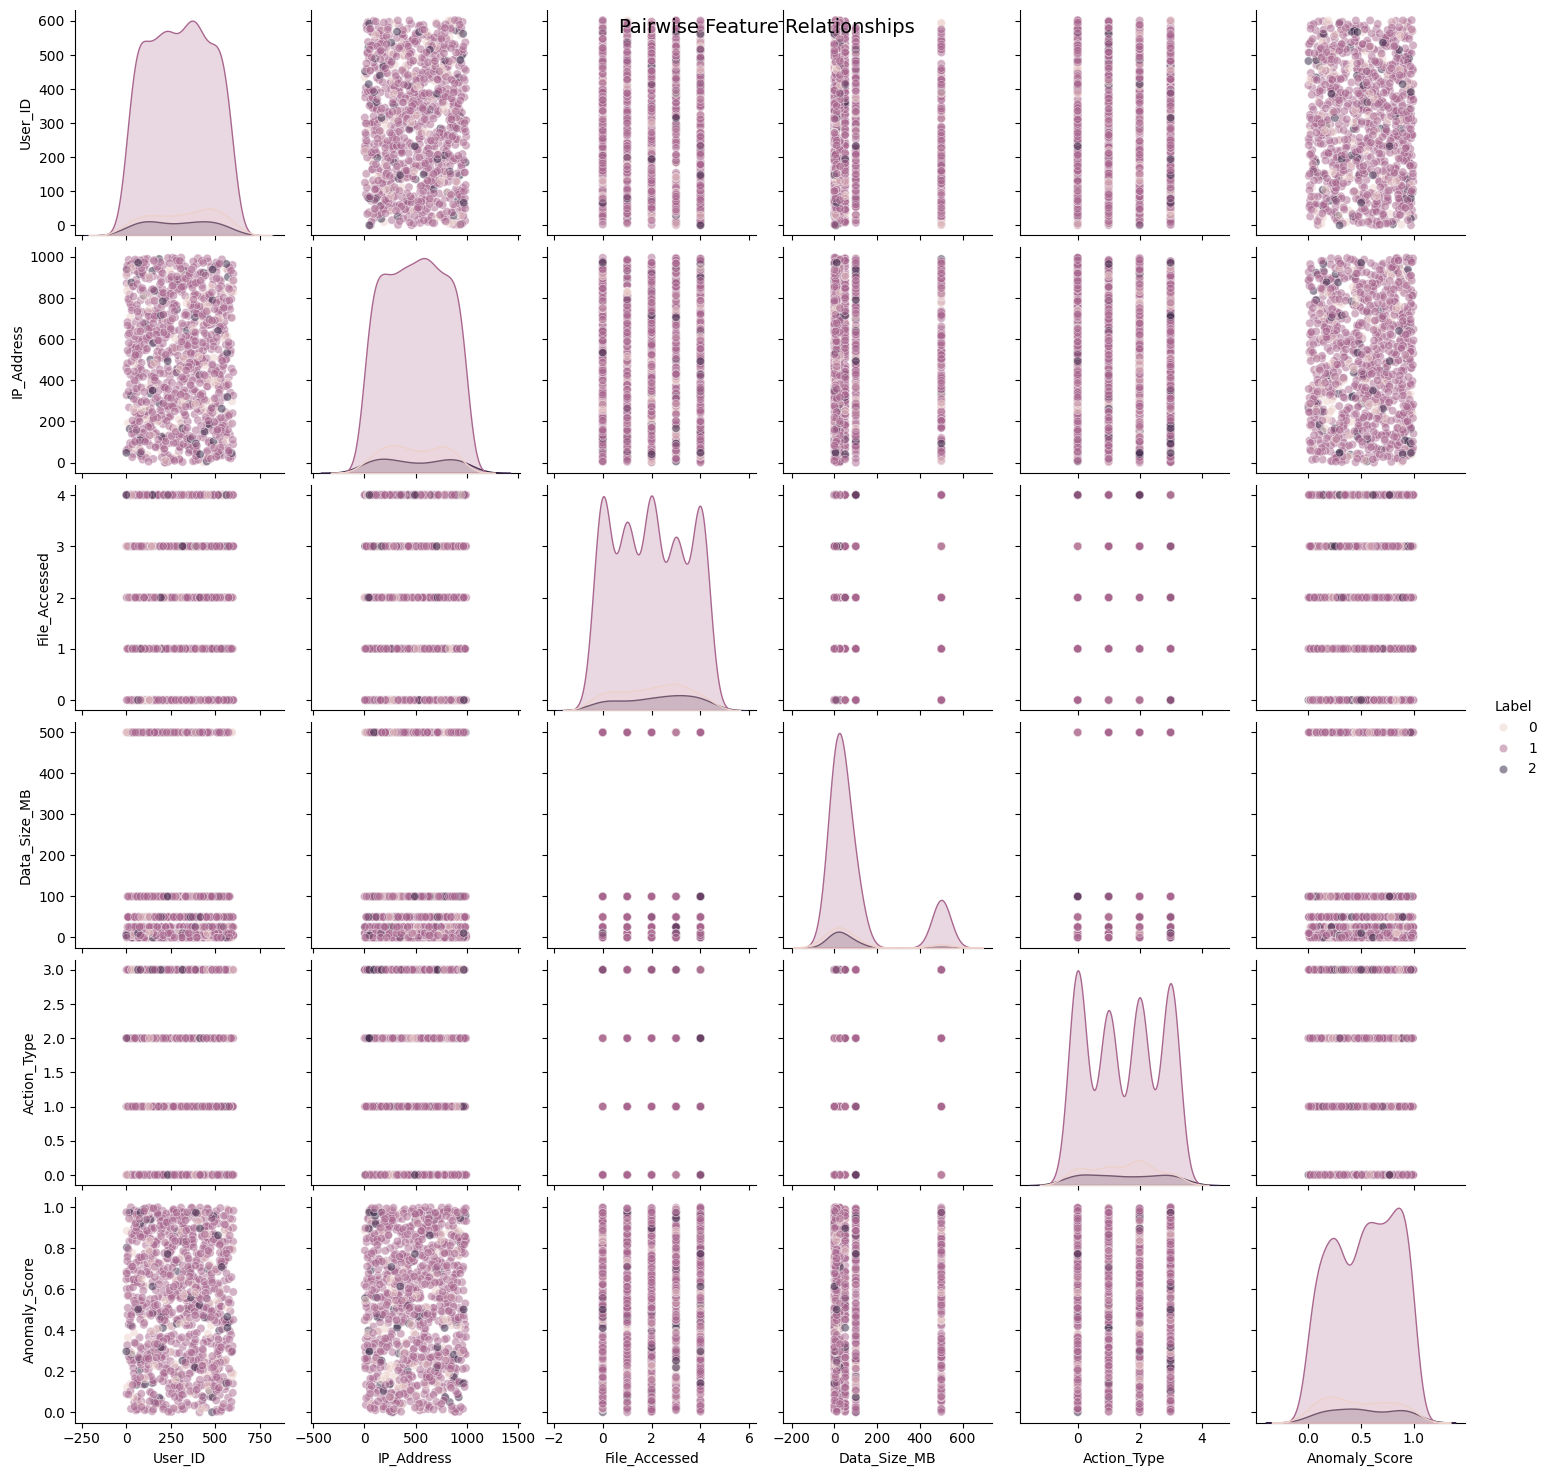

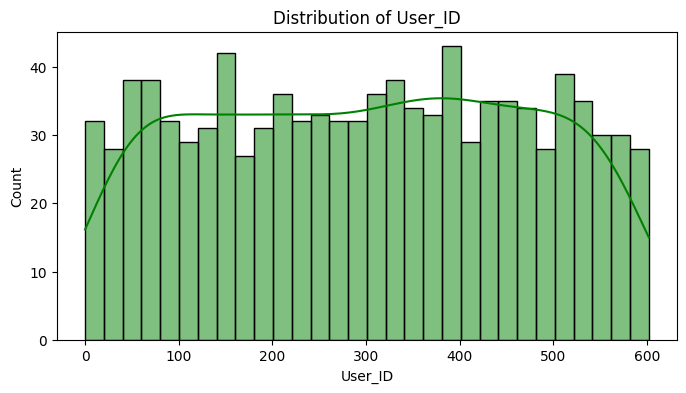

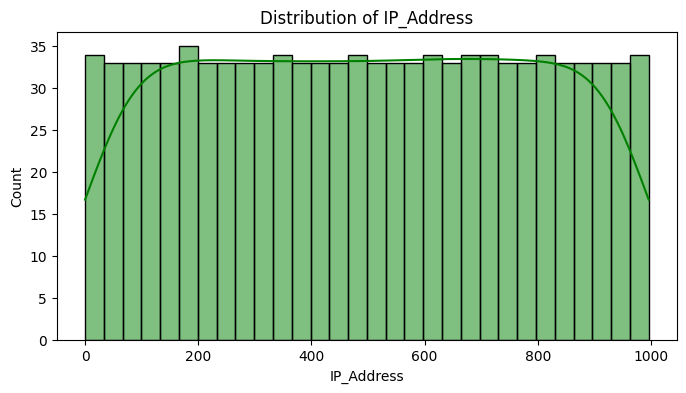

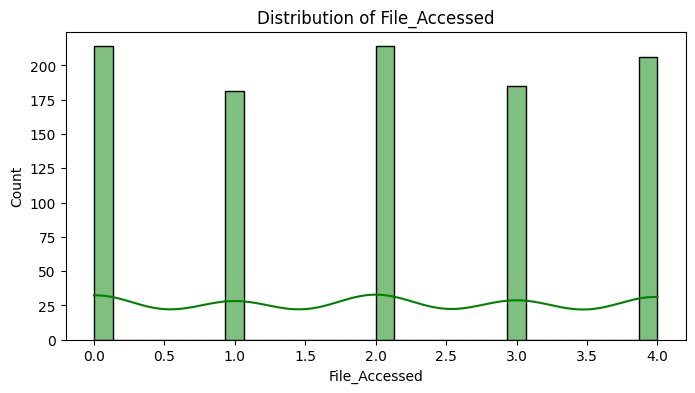

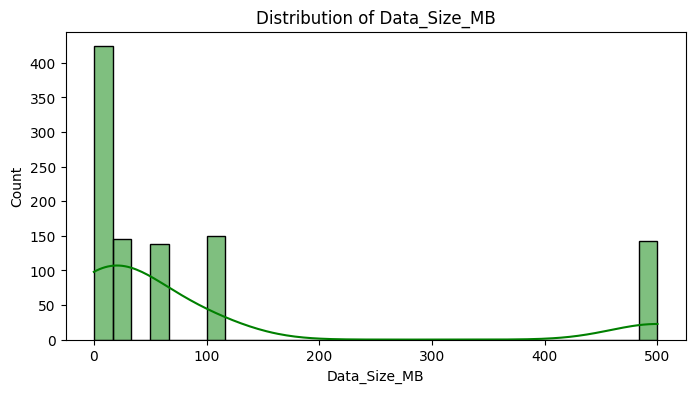

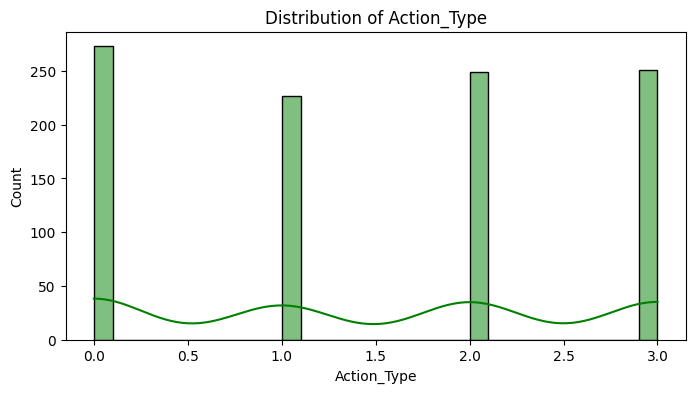

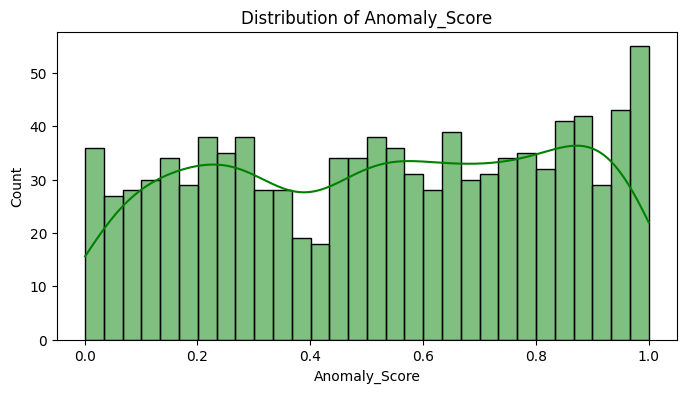

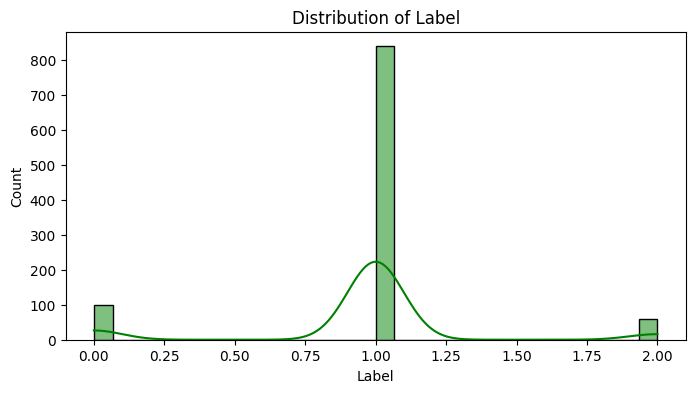

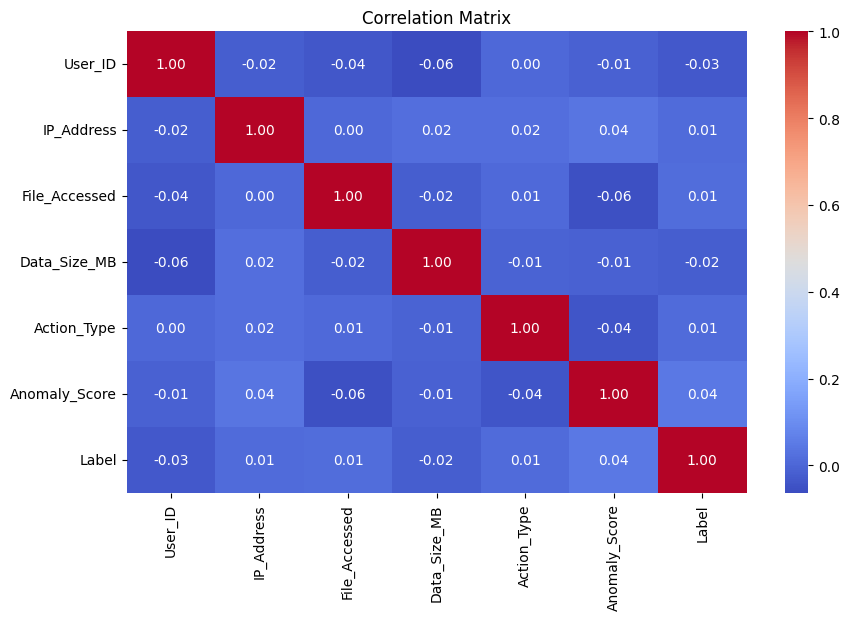


Training Logistic Regression...
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.84      1.00      0.92       169
           2       0.00      0.00      0.00        13

    accuracy                           0.84       200
   macro avg       0.28      0.33      0.31       200
weighted avg       0.71      0.84      0.77       200

Accuracy: 0.845


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


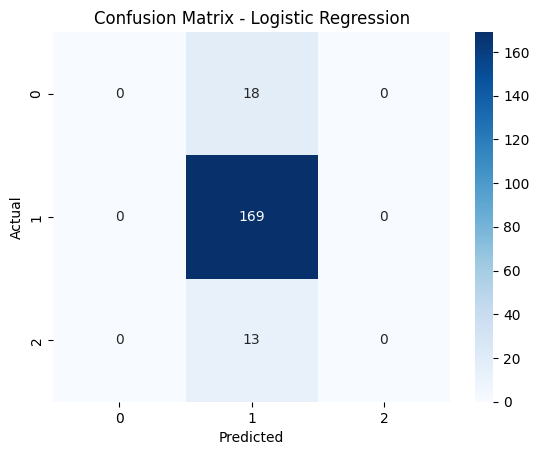

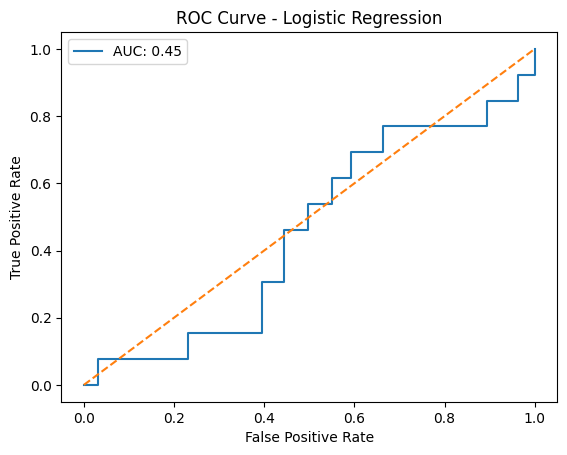

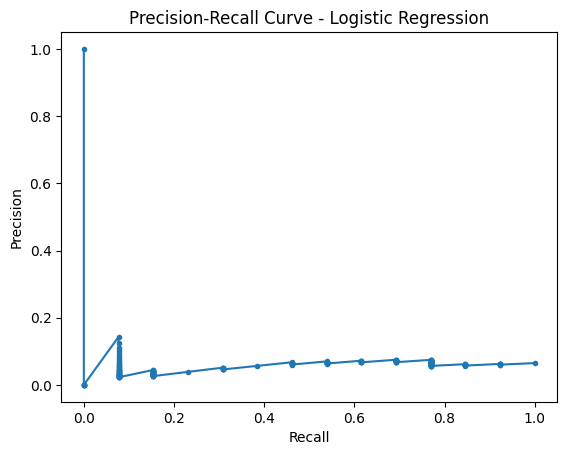


Training Decision Tree...
Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.17      0.14        18
           1       0.85      0.83      0.84       169
           2       0.00      0.00      0.00        13

    accuracy                           0.71       200
   macro avg       0.32      0.33      0.33       200
weighted avg       0.73      0.71      0.72       200

Accuracy: 0.715


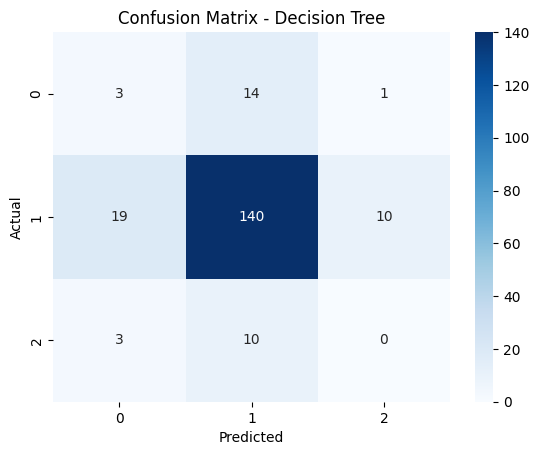

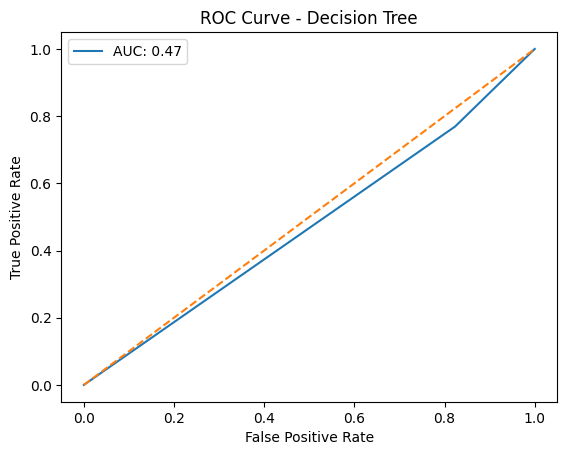

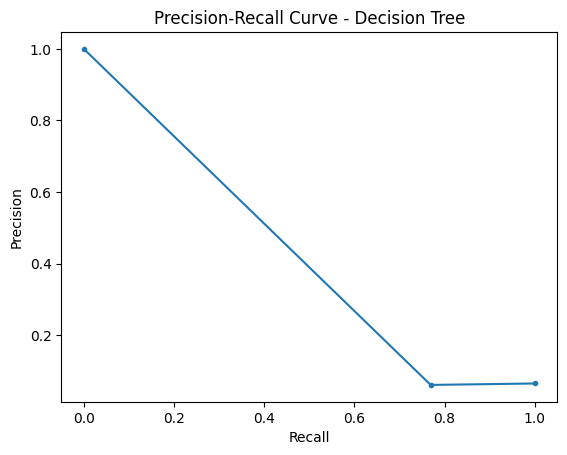


Training Random Forest...
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.84      1.00      0.92       169
           2       0.00      0.00      0.00        13

    accuracy                           0.84       200
   macro avg       0.28      0.33      0.31       200
weighted avg       0.71      0.84      0.77       200

Accuracy: 0.845


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


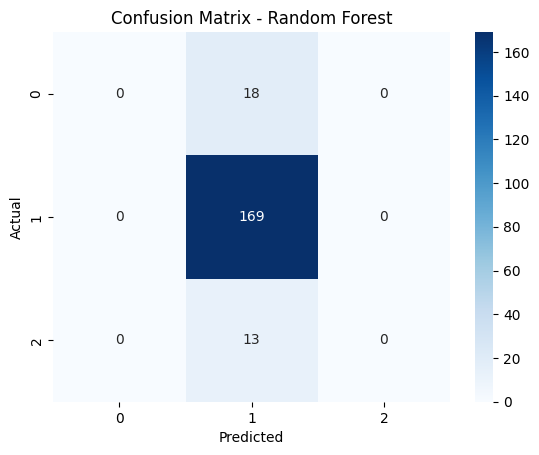

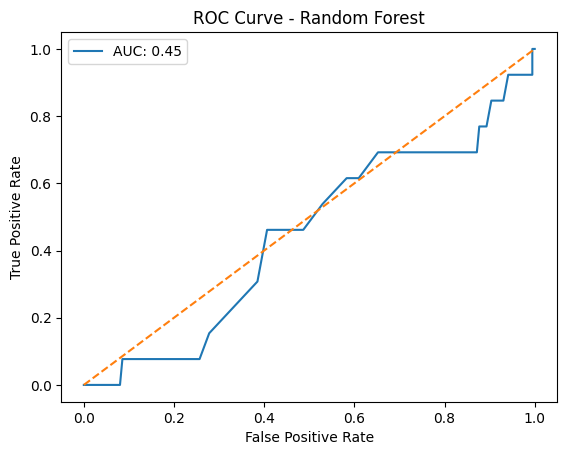

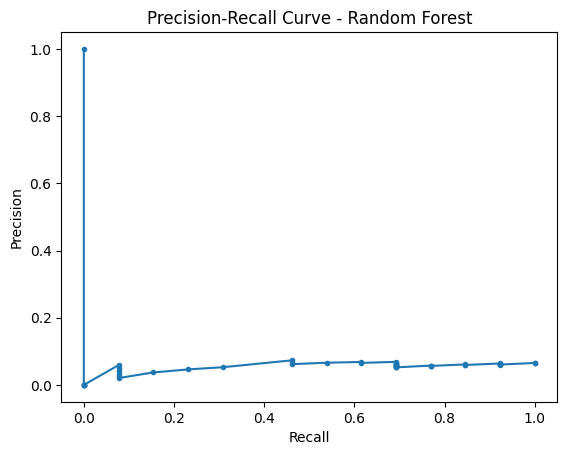


Training Gradient Boosting...
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.85      0.98      0.91       169
           2       0.00      0.00      0.00        13

    accuracy                           0.82       200
   macro avg       0.28      0.33      0.30       200
weighted avg       0.72      0.82      0.77       200

Accuracy: 0.825


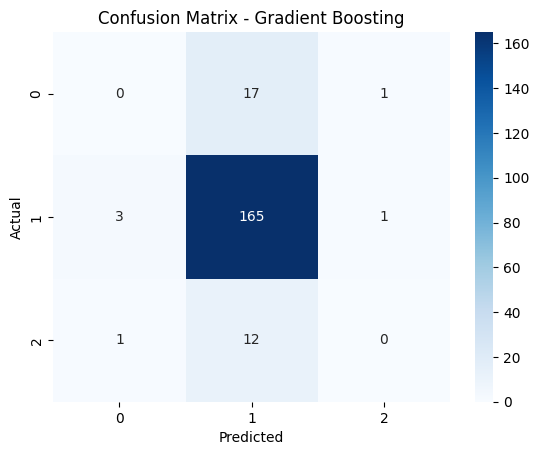

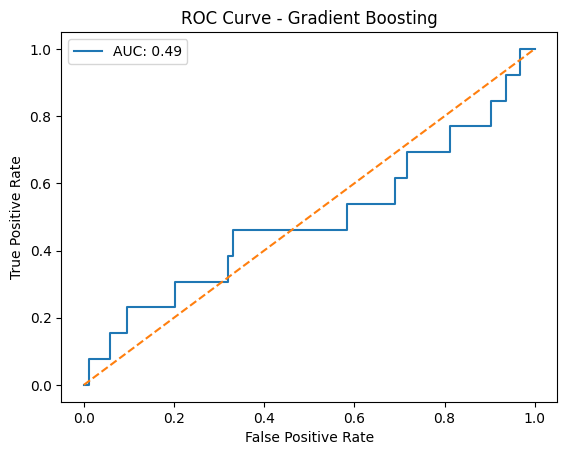

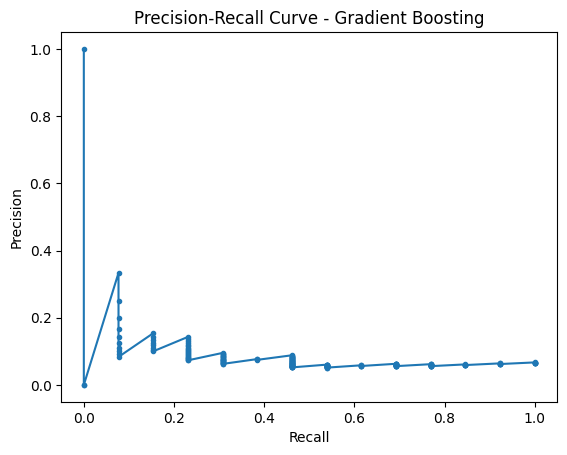

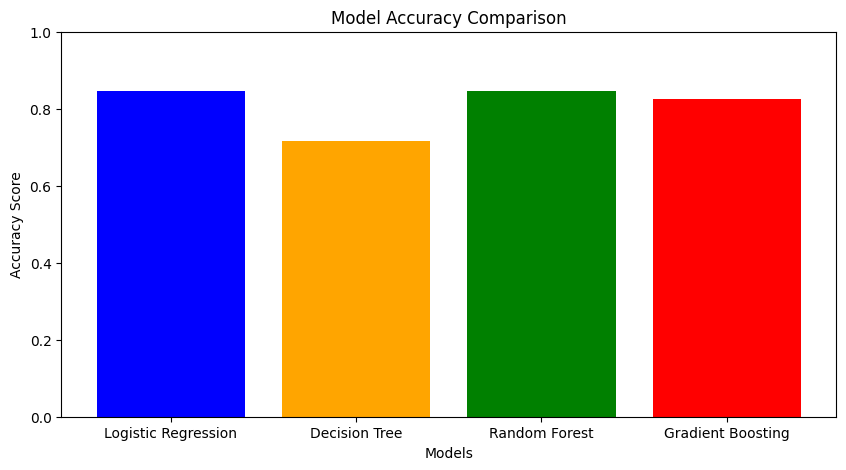

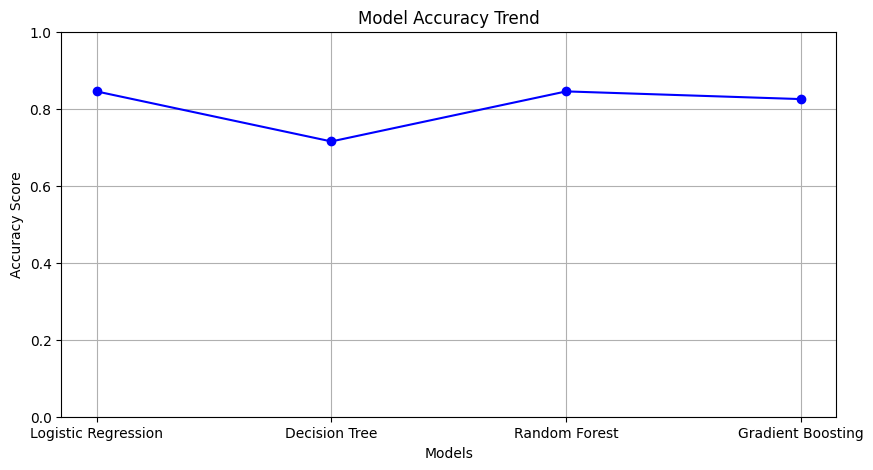

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Accuracy: 0.8387494954615002


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve

# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cloud_security_large_dataset.csv')

# Display dataset columns for debugging
print("Available columns:", df.columns)

# Remove any leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# Convert timestamp column to datetime if exists and drop them before modeling
date_cols = [col for col in df.columns if 'date' in col.lower() or 'time' in col.lower()]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Drop datetime columns before processing
df = df.drop(columns=date_cols, errors='ignore')

# Display basic statistical info
print(df.describe())

# Check if categorical columns exist before encoding
expected_categorical_cols = ['User_ID', 'IP_Address', 'File_Accessed', 'Action_Type', 'Label']
categorical_cols = [col for col in expected_categorical_cols if col in df.columns]

# Encoding categorical columns
label_encoders = {}
for col in categorical_cols:
    print(f"Encoding column: {col}")
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string before encoding
    label_encoders[col] = le

# Data Visualizations

## Histogram for feature distribution
df.hist(figsize=(12, 8), bins=30, color='blue', edgecolor='black')
plt.suptitle("Feature Distributions - Histogram", fontsize=14)
plt.show()

## Pairwise relationships using Pairplot
sns.pairplot(df, hue="Label", diag_kind="kde", plot_kws={'alpha': 0.5})
plt.suptitle("Pairwise Feature Relationships", fontsize=14)
plt.show()

## Distribution Plot for key features
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=30, kde=True, color='green')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Correlation Matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Splitting Data
if 'Label' in df.columns:
    X = df.drop(columns=['Label'])  # Features
    y = df['Label']  # Target
else:
    raise KeyError("Label column is missing from the dataset")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models to compare
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier()
}

model_accuracies = {}

# Training and evaluation
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    model_accuracies[name] = acc

    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", acc)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # ROC Curve
    if y_pred_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob, pos_label=y.max())
        plt.plot(fpr, tpr, label=f'AUC: {auc(fpr, tpr):.2f}')
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend()
        plt.show()

    # Precision-Recall Curve
    if y_pred_prob is not None:
        precision, recall, _ = precision_recall_curve(y_test, y_pred_prob, pos_label=y.max())
        plt.plot(recall, precision, marker='.')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve - {name}')
        plt.show()

# Model Accuracy Comparison
plt.figure(figsize=(10,5))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'orange', 'green', 'red'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.xlabel("Models")
plt.ylim(0, 1)
plt.show()

# Model Accuracy Line Graph
plt.figure(figsize=(10,5))
plt.plot(list(model_accuracies.keys()), list(model_accuracies.values()), marker='o', linestyle='-', color='blue')
plt.title("Model Accuracy Trend")
plt.ylabel("Accuracy Score")
plt.xlabel("Models")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters for Random Forest:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
